## Observations and Insights 

In [222]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata,study_results, on='Mouse ID')
# Display the data table for preview
print(merge)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [15]:
# Checking the number of mice.
mouse_number = (merge['Mouse ID'].value_counts())
print(len(mouse_number))

249


In [174]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicates = merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
duplicates




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [34]:
# Checking the number of mice in the clean DataFrame.
mouse_number2 = len(duplicates['Mouse ID'].value_counts())
mouse_number2

249

## Summary Statistics

In [346]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean = duplicates.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = duplicates.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = duplicates.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
stdev = duplicates.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = duplicates.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

mean_df = pd.DataFrame(mean)
median_df = pd.DataFrame(median)
variance_df = pd.DataFrame(variance)
stdev_df = pd.DataFrame(stdev)
sem_df = pd.DataFrame(sem)


summary = pd.merge(mean_df, median_df, on="Drug Regimen")
summary = pd.merge(summary, variance_df, on='Drug Regimen')
summary = pd.merge(summary, stdev_df, on="Drug Regimen")
summary = pd.merge(summary, sem_df, on="Drug Regimen")
summary.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_df = pd.DataFrame(summary)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregate = duplicates.groupby('Drug Regimen').agg(
    
    Mean = ('Tumor Volume (mm3)', 'mean'),
    Median = ('Tumor Volume (mm3)', 'median'),
    Variance = ('Tumor Volume (mm3)', 'var'),
    StandardDeviation = ('Tumor Volume (mm3)', 'std'),
    SEM = ('Tumor Volume (mm3)', 'sem')
    
)

print (aggregate)

                   Mean     Median   Variance  StandardDeviation       SEM
Drug Regimen                                                              
Capomulin     40.675741  41.557809  24.947764           4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177           6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684           6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577           8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479           8.134708  0.596466
Placebo       54.033581  52.288934  61.168083           7.821003  0.581331
Propriva      52.393463  50.909965  43.138803           6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704           4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562           7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355           6.966589  0.516398


## Bar and Pie Charts

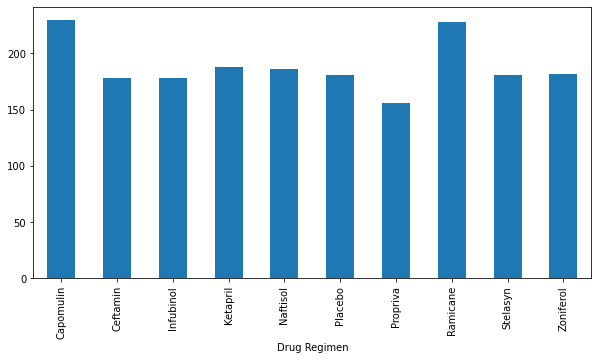

In [226]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

plotdata = duplicates.groupby('Drug Regimen').count()['Timepoint'].plot(kind='bar')






Text(0, 0.5, 'Number of Timepoints')

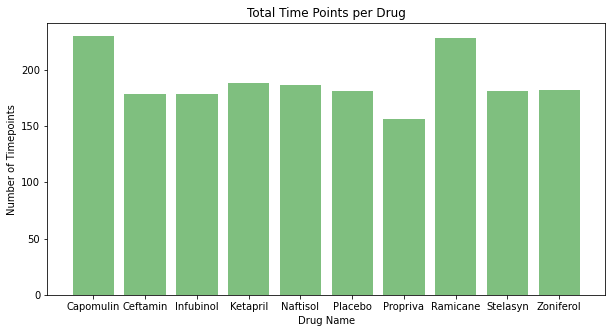

In [225]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = duplicates.iloc[:, 1]
drugs = drugs.drop_duplicates(keep = 'first').tolist()
x_axis = np.arange(len(drugs))

y_axis = duplicates.groupby('Drug Regimen').count()['Timepoint']

plt.bar(drugs, y_axis, color='g', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.title("Total Time Points per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of Timepoints")

([<matplotlib.patches.Wedge at 0x7ff7e6f13a00>,
 [Text(-0.7265028750894216, -0.8259501029038041, 'Female'),
  Text(0.726502952420448, 0.8259500348836922, 'Male')])

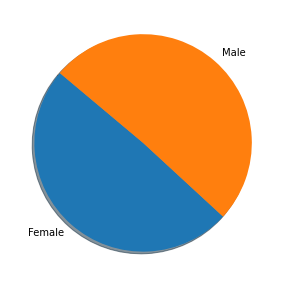

In [269]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plt.pie( duplicates.groupby('Sex').count()['Mouse ID'], labels = labels, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x7ff7e6b1fdc0>,
 [Text(-0.7265028750894216, -0.8259501029038041, 'Female'),
  Text(0.726502952420448, 0.8259500348836922, 'Male')])

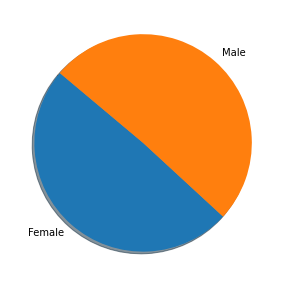

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

duplicates.groupby('Sex').count()

plt.pie( duplicates.groupby('Sex').count()['Mouse ID'], labels = labels, shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [347]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


max_time = duplicates.groupby(['Mouse ID'])['Timepoint'].max()
merge2 = pd.merge(duplicates,max_time, on=['Mouse ID', 'Timepoint'], how = 'right' )
merge2




    







,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [540]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
volume = []

for drug in drugs:
    volume.append(merge2.loc[merge2['Drug Regimen'] == drug]['Tumor Volume (mm3)'])

volume


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset 
# Determine outliers using upper and lower bounds
# volume_cap = pd.DataFrame()
# volume_rami = pd.DataFrame()
# volume_infu = pd.DataFrame()
# volume_ceft = pd.DataFrame()
# volume_cap = volume_cap.assign(capomulin = volume[0])
# volume_rami = volume_rami.assign(ramicane = volume[1])
# volume_infu = volume_infu.assign(infubinol = volume[2])
# volume_ceft = volume_ceft.assign(ceftamin = volume[3])

# #Capomulin Outliers
# quartiles = volume_cap.quantile([.25,.5,.75])
# lowerq = quartiles['capomulin'][.25]
# upperq = quartiles['capomulin'][.75]
# iqr = upperq-lowerq


# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# outlier_cap1 = volume_cap.loc[volume_cap["capomulin"] < lower_bound]
# outlier
# outlier_cap2 = volume_cap.loc[volume_cap["capomulin"] > upper_bound]
# outlier

volumes = []
outliers1 ={}
outliers2 ={}

for i in range(len(drugs)): 
    drug = drugs[i]
    volume_df = pd.DataFrame()
    volume_df = volume_df.assign(drug = volume[i])
    quartiles = volume_df.quantile([.25,.5,.75])
    
    lowerq = quartiles["drug"][.25]
    upperq = quartiles["drug"][.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_low = volume_df.loc[volume_df["drug"] < lower_bound]
    
    outlier_high = volume_df.loc[volume_df["drug"] > upper_bound]
    
    
    outliers1[drug] = outlier_low
    outliers2[drug] = outlier_high
    
    
   
    
print(outliers1['Infubinol'])
# print(outliers2)





         drug
31  36.321346


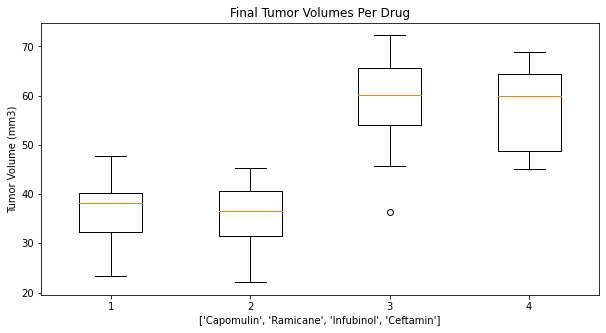

In [548]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Per Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(volume)
plt.show()

## Line and Scatter Plots

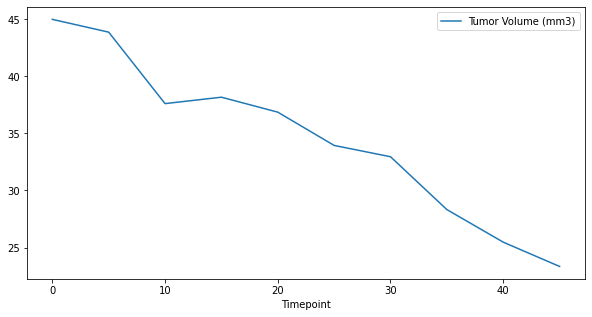

In [600]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = duplicates.loc[duplicates["Drug Regimen"] == "Capomulin"]
lines = capomulin.loc[capomulin['Mouse ID'] == 's185'].plot.line(x='Timepoint', y='Tumor Volume (mm3)')



<AxesSubplot:title={'center':'Tumor Volume vs Mouse Weight'}, xlabel='Weight (g)', ylabel='[Tumor Volume (mm3)]'>

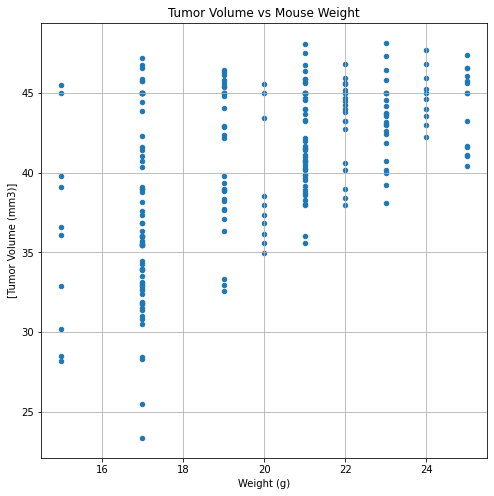

In [648]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data = capomulin.groupby(capomulin['Weight (g)']).mean()['Tumor Volume (mm3)']
capomulin.plot(kind="scatter", x="Weight (g)", y= ['Tumor Volume (mm3)'], grid=True, figsize=(8,8),title="Tumor Volume vs Mouse Weight")

               
               

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [651]:
average = capomulin.groupby(capomulin['Weight (g)']).mean()['Tumor Volume (mm3)']
capomulin_cor = capomulin.corr()
capomulin_cor

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,-0.169172,-0.057964,-0.021604,0.006748
Weight (g),-0.169172,1.000000,-0.035271,0.525700,-0.119149
Timepoint,-0.057964,-0.035271,1.000000,-0.584271,0.584006
Tumor Volume (mm3),-0.021604,0.525700,-0.584271,1.000000,-0.313092
Metastatic Sites,0.006748,-0.119149,0.584006,-0.313092,1.000000


Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64